<a href="https://colab.research.google.com/github/fAikoH-dot/TCC-v1/blob/main/arima/AUTO_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [53]:
df = pd.read_csv("sample_data/Soja_v1.csv", sep = ";")
df = df.sort_values(by='Data')
df.set_index("Data", inplace = True)
df.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima
245,2004-03-01,Soja,45.3777,50.0455,0,1.034,1.000,1.064,92600.0
244,2004-04-01,Soja,45.9456,48.7279,0,81400.000,1.036,1.063,81200.0
243,2004-05-01,Soja,44.8723,47.4930,0,89300.000,82800.000,94000.000,0.0
242,2004-06-01,Soja,38.5913,40.7781,0,59950.000,89200.000,1.035,59900.0
241,2004-07-01,Soja,34.0818,37.5474,0,62725.000,59100.000,71200.000,56500.0


In [9]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.8 MB/s eta 0:00:00


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from pmdarima.arima import auto_arima
from pmdarima import arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from matplotlib.pyplot import rcParams

rcParams['figure.figsize']=15,6

from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX

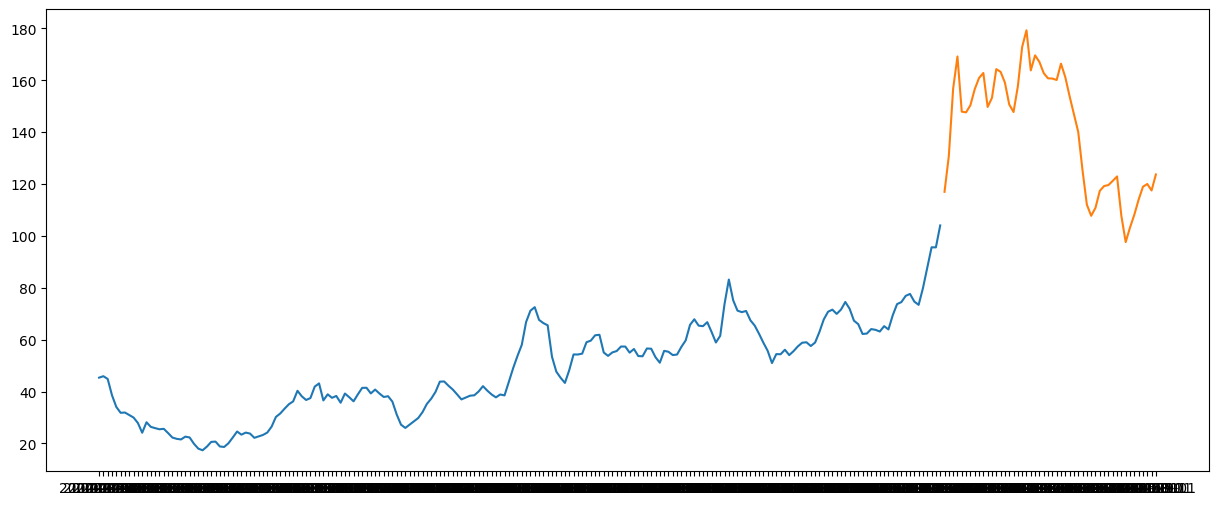

In [73]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

train = train.Estadual
test = test.Estadual

plt.plot(train)
plt.plot(test)

In [34]:
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df["Estadual"])

##Dado Estacionário > I = 0

(0.22413105593652022, True)

In [35]:
arima_model = auto_arima(train, start_p=0, d=0, start_q=0,
                         max_p = 5, max_d = 5, max_q = 5,
                         start_P = 0, D = 0, start_Q=5,
                         max_P=5, max_D=5, max_Q=5,
                         m=12, seasonal=True, error_action ="warn",
                         Trace=True, random_state=20, n_fits=50)

In [40]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  196
Model:             SARIMAX(1, 0, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -488.071
Date:                                 Thu, 17 Oct 2024   AIC                            990.141
Time:                                         18:41:30   BIC                           1013.088
Sample:                                              0   HQIC                           999.431
                                                 - 196                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0723      0.198      0.366      0.714      -0.315       0.459
ar.L1          0.9857      0.016     61.851      0.000       0.954       1.017
ma.L1          0.3912      0.077      5.091      0.000       0.241       0.542
ar.S.L12       0.9219      0.191      4.822      0.000       0.547       1.297
ma.S.L12      -0.9560      0.224     -4.273      0.000      -1.395      -0.517
ma.S.L24       0.1162      0.084      1.376      0.169      -0.049       0.282
sigma2         8.2155      0.627     13.099      0.000       6.986       9.445
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                39.77
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test)),
                          # index=test.index
                          )
prediction.columns = ["predicted_Estadual"]
prediction.index = test.index
prediction

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_Estadual
Data,
2020-08-01,107.220817
2020-09-01,107.276103
2020-10-01,106.533390
2020-11-01,105.411057
2020-12-01,104.405515
2021-01-01,102.435952
2021-02-01,101.066718
2021-03-01,100.478257
2021-04-01,99.839817


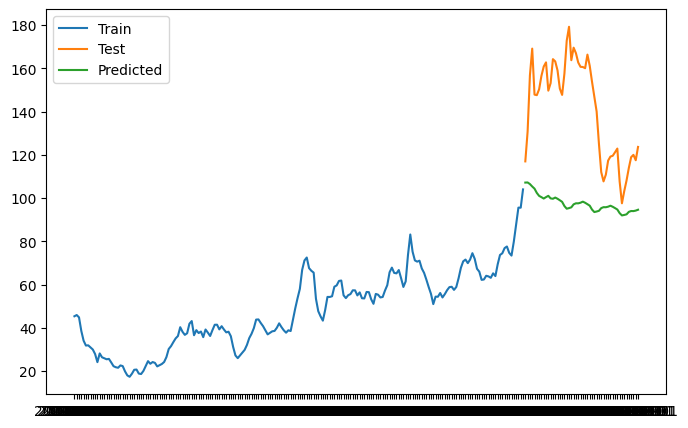

In [47]:
plt.figure(figsize=(8,5))
plt.plot(train, label = "Train")
plt.plot(test, label = "Test")
plt.plot(prediction, label = "Predicted")
plt.legend(loc='upper left')
plt.show()

In [74]:
test = pd.DataFrame(test)

In [75]:
test["predict_Estadual"] = prediction['predicted_Estadual']
test

,Estadual,predict_Estadual
Data,,
2020-08-01,117.0222,107.220817
2020-09-01,130.8449,107.276103
2020-10-01,156.7972,106.533390
2020-11-01,169.1946,105.411057
2020-12-01,147.9145,104.405515
2021-01-01,147.6618,102.435952
2021-02-01,150.3854,101.066718
2021-03-01,156.5591,100.478257
2021-04-01,160.8866,99.839817


In [76]:
from sklearn.metrics import r2_score

In [77]:
r2_score(test["Estadual"], test["predict_Estadual"])

-3.658207670777461

Não-estacionário para Estacionário


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
ts = pd.Series(df["Estadual"])

In [118]:
ts.load()

AttributeError: 'Series' object has no attribute 'load'

In [110]:
data = co2.load().data
data.dtypes

,0
co2,float64


In [98]:
from statsmodels.datasets import co2
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

data = co2.load().data
data = data.resample('ME').mean().ffill()

In [86]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

data = df.load(True).data
data = data.resample('M').mean().ffill()

# Remove freq info
data.index = [i for i in range(data.shape[0])]

res = STL(data, period=12).fit()
res.plot()
plt.show()

ValueError: Unable to determine period from endog